# Data import
import labeled dataset and remove all rows that do not posses a label.

In [1]:
import pandas as pd


# Load your data
data = pd.read_csv('../../data/test_dataset_for_other_models.csv', sep=";", encoding="latin1")

data.head()
# Get all rows that are non empty
cleanedData = data[data['Studium_Label'].notnull()]
print(cleanedData.head())

   Unnamed: 0                                            Studium Studium_Label
0          60  Das Studium in Exeter war au§erordentlich sch...      positive
1         511  Chulalongkorn ist ein Trumchen. Das Kursangeb...      positive
2         260  Das Studium an sich ist weniger anspruchsvoll ...       neutral
3         694  Bereits im Sommer hatten wir eine Mail erhalte...       neutral
4         731  Es sind sehr viele Kurse auf Englisch angebote...      positive


# Model application

imports the BERT based germantsentiment model created by oliver guhr (https://huggingface.co/oliverguhr/german-sentiment-bert). The model is then applied to only the text of an column. The for loop can be expanded to accomodatae for multiple columns.

In [2]:
from germansentiment import SentimentModel
#load the model
model = SentimentModel()
#selects to be labeled columns
columns = ['Studium']
for x in columns:
    cleanedData[x] = cleanedData[x].astype(str)
    #predict results
    results = model.predict_sentiment(cleanedData[x])
    print("------------------------------")
    print("Results of: " + x)
    print("negative entries: " + str(results.count('negative')))
    print("positive entries: " + str(results.count('positive')))
    print("neutral entries: " + str(results.count('neutral')))
    print("------------------------------")

/Users/fabianstreitleisure/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/Users/fabianstreitleisure/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


------------------------------
Results of: Studium
negative entries: 28
positive entries: 49
neutral entries: 180
------------------------------


In [3]:
#append prediction to dataframe
cleanedData['SentimentPrediction'] = results
cleanedData.head()

,Unnamed: 0,Studium,Studium_Label,SentimentPrediction
0,60,Das Studium in Exeter war au§erordentlich sch...,positive,positive
1,511,Chulalongkorn ist ein Trumchen. Das Kursangeb...,positive,positive
2,260,Das Studium an sich ist weniger anspruchsvoll ...,neutral,neutral
3,694,Bereits im Sommer hatten wir eine Mail erhalte...,neutral,neutral
4,731,Es sind sehr viele Kurse auf Englisch angebote...,positive,positive


# Evaluation
For evaluation purposes we employ confusion matrices and the micro averaged F1 Score

In [4]:
def calculateMatch(df):
    match_count = (df['Studium_Label'] == df['SentimentPrediction']).sum()
    return match_count

In [5]:
print(calculateMatch(cleanedData))

134


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


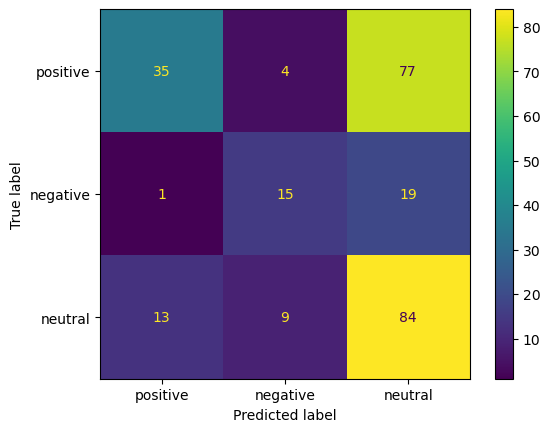

0.5214007782101168
              precision    recall  f1-score   support

    positive       0.54      0.43      0.48        35
    negative       0.47      0.79      0.59       106
     neutral       0.71      0.30      0.42       116

    accuracy                           0.52       257
   macro avg       0.57      0.51      0.50       257
weighted avg       0.59      0.52      0.50       257



In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
import matplotlib.pyplot as plt
#calculate and display the confusion matrix
confusion_mat = confusion_matrix(cleanedData['Studium_Label'], cleanedData['SentimentPrediction'], labels=['positive', 'negative', 'neutral'])

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['positive', 'negative', 'neutral'])
disp.plot()
plt.show()
#calculate and print f1 score
print(f1_score(cleanedData['Studium_Label'], cleanedData['SentimentPrediction'], labels=['positive', 'negative', 'neutral'], average='micro'))
print(classification_report(
    cleanedData['Studium_Label'],
    cleanedData['SentimentPrediction'],
    output_dict=False,
    target_names=['positive', 'negative', 'neutral']
))